Give k, Which numbers in 1..k that when flipped as mirror image are still valid numbers in the k range. 
E.g. for k=650, 18 -> 81, 61 -> 19, 15->51, 189 -> 981 (> 650 so not valid)



In [85]:
def mirror_numbers(k):
    numbers = generate_candidates(k)
    print ("candidates:", numbers )
    numbers[:] = [x for x in numbers if not is_filter_candidate(x, k)]
    return set(numbers)

num_dict = {'0':'0', '1':'1', '6':'9', '8':'8', '9':'6' } # valid mappings
digits = num_dict.keys()
print (num_dict)
print (digits)

def generate_candidates(k):
    candidates = []
    for ndigits in range(1,len(str(k)) + 1 ):
        candidates += generate_permutations(ndigits)
    return candidates

def generate_permutations(size):
    perms = [map_number(x, num_dict) for x in itertools.permutations(digits, size)]  
    return perms

def map_number(n, ndict):
    return "".join([ndict[x] for x in reversed(n)])
    
# filter a given number 
def is_filter_candidate(c, k):
    if (c[0] == '0') or (int("".join(c)) > k):
        return True
    return False


{'9': '6', '0': '0', '6': '9', '1': '1', '8': '8'}
dict_keys(['9', '0', '6', '1', '8'])


In [86]:
#generate_candidates(500)
o = mirror_numbers(500)
print(o)

candidates: ['6', '0', '9', '1', '8', '06', '96', '16', '86', '60', '90', '10', '80', '69', '09', '19', '89', '61', '01', '91', '81', '68', '08', '98', '18', '906', '106', '806', '096', '196', '896', '016', '916', '816', '086', '986', '186', '960', '160', '860', '690', '190', '890', '610', '910', '810', '680', '980', '180', '069', '169', '869', '609', '109', '809', '619', '019', '819', '689', '089', '189', '061', '961', '861', '601', '901', '801', '691', '091', '891', '681', '081', '981', '068', '968', '168', '608', '908', '108', '698', '098', '198', '618', '018', '918']
 ++ 6 6
 ++ 0 0
 ++ 9 9
 ++ 1 1
 ++ 8 8
 ++ 06 06
 ++ 96 96
 ++ 16 16
 ++ 86 86
 ++ 60 60
 ++ 90 90
 ++ 10 10
 ++ 80 80
 ++ 69 69
 ++ 09 09
 ++ 19 19
 ++ 89 89
 ++ 61 61
 ++ 01 01
 ++ 91 91
 ++ 81 81
 ++ 68 68
 ++ 08 08
 ++ 98 98
 ++ 18 18
 ++ 906 906
 ++ 106 106
 ++ 806 806
 ++ 096 096
 ++ 196 196
 ++ 896 896
 ++ 016 016
 ++ 916 916
 ++ 816 816
 ++ 086 086
 ++ 986 986
 ++ 186 186
 ++ 960 960
 ++ 160 160
 ++ 860 860
 +

In [4]:
a=[1,2,3,4,6,8]
a[:] = [x for x in a if not determine(x)]

1
2
3
4
6
8


In [21]:
x = '011'
x = ['0', '1', '1']
import itertools
print([i for i in itertools.permutations(x)])
print(["".join(i) for i in itertools.permutations(x)])
l = ["".join(i) for i in itertools.permutations(x)]
print(set(l))

[('0', '1', '1'), ('0', '1', '1'), ('1', '0', '1'), ('1', '1', '0'), ('1', '0', '1'), ('1', '1', '0')]
['011', '011', '101', '110', '101', '110']
{'110', '101', '011'}


## Next

Suppose we could access yesterday's stock prices as a list, where: 
The indices are the time in minutes past trade opening time, which was 9:30am local time. 
The values are the price in dollars of Apple stock at that time. 
So if the stock cost $500 at 10:30am, stock_prices_yesterday[60] = 500. 
Write an efficient function that takes stock_prices_yesterday and returns the best profit I could have made from 1 purchase and 1 sale of 1 Apple stock yesterday. 


In [52]:
from datetime import time, timedelta, datetime
import numpy as np




In [51]:

def algo1_r2(a):
"""
    O(n^2) algorithm that computes very pair different and returns max difference
    arguments: 
    a : array of stock values 
"""    profit = 0
    for i in range (len(a)):
        i_max = 0 
        i_l = i
        for j in range (i+1, len(a)):
            if(a[j]-a[i] > i_max):
                i_h = j
                i_max = a[j]-a[i]
        if(i_max > profit):
            profit = i_max
            p_l = i_l
            p_h = i_h
    
    print("min:", min(a), "max:", max(a))
    print("max profit:", profit, ", buy at:", a[p_l], ", sell at:", a[p_h])


    

480
min: 150.027619017 max: 199.96567265
max profit: 49.9380536326 , buy at: 150.027619017 , sell at: 199.96567265


In [81]:
def algo2(a):
    min_i = 0
    max_d = 0
    l = h = 0
    
    for i in range(len(a)):
        if(a[i] < a[min_i]):
            min_i = i 
        if(a[i] - a[min_i] > max_d):
            max_d = a[i] - a[min_i]
            l = min_i 
            h = i
    
    print("min:", min(a), "max:", max(a))
    print("max profit:", max_d, ", buy at:", a[l], ", sell at:", a[h])



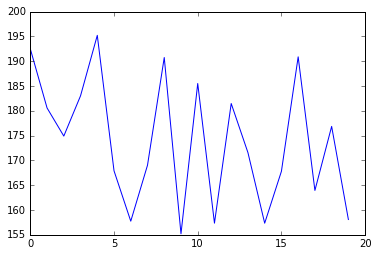

20
min: 155.205390818 max: 195.211370318
max profit: 35.6726675453 , buy at: 155.205390818 , sell at: 190.878058363
min: 155.205390818 max: 195.211370318
max profit: 35.6726675453 , buy at: 155.205390818 , sell at: 190.878058363


In [83]:
# number of values between 9:30am to 5:30pm 
num_mins = (timedelta(hours=17, minutes=30, seconds=0) - timedelta(hours=9, minutes=30, seconds=0) ).total_seconds()/60
l = 150; h = 200 ; num_mins = 20
stock_values = np.random.uniform(l,h, int(num_mins))
#print(stock_values)

import matplotlib.pyplot as plt 
plt.plot(stock_values)
plt.show()
print (len(stock_values))
algo1_r2(stock_values)
algo2(stock_values)